# Modelling and Predicting

Answering the core questions for this assignment

`Q1` - **SR/SDR Optimization** - Which SR or SDR should talk with each kind of lead?

`Q2` - **Closing Prediction** - Which deals will be closed? Comes under SR/SDR

`Q3` - **Customer Lifetime Value** - How much a customer will bring in future revenue?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0)

#using the cleaned marketing funnel data to merge with sellers
funnel_df = pd.read_csv("output/cleaned_marketing_funnel.csv")

## For Q1, SR/SDR Optimization

In [2]:
#Lets see the business segments and lead types and compare them over SRs in closed deals
segment_df = funnel_df.groupby(["sr_id","business_segment"]).count().seller_id.reset_index(name="count")
lead_df = funnel_df.groupby(["sr_id","lead_type"]).count().seller_id.reset_index(name="count")

#ordering and cleaning data of NaN/NA values
segment_df = segment_df.pivot(index= "sr_id", columns= "business_segment", values= "count").fillna(0)
lead_df= lead_df.pivot(index= "sr_id", columns= "lead_type", values= "count").fillna(0)

#summarising groupby totals for better stack graph visualization
segment_df["total"] = segment_df.sum(axis=1)
segment_df = segment_df.sort_values("total",ascending= True).drop(["total"],axis=1)

lead_df["total"] = lead_df.sum(axis=1)
lead_df = lead_df.sort_values("total",ascending= True).drop(["total"],axis=1)


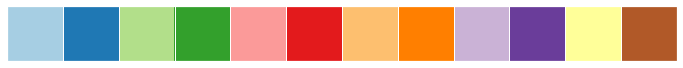

In [3]:
sns.set()
sns.palplot(sns.color_palette("Paired"))

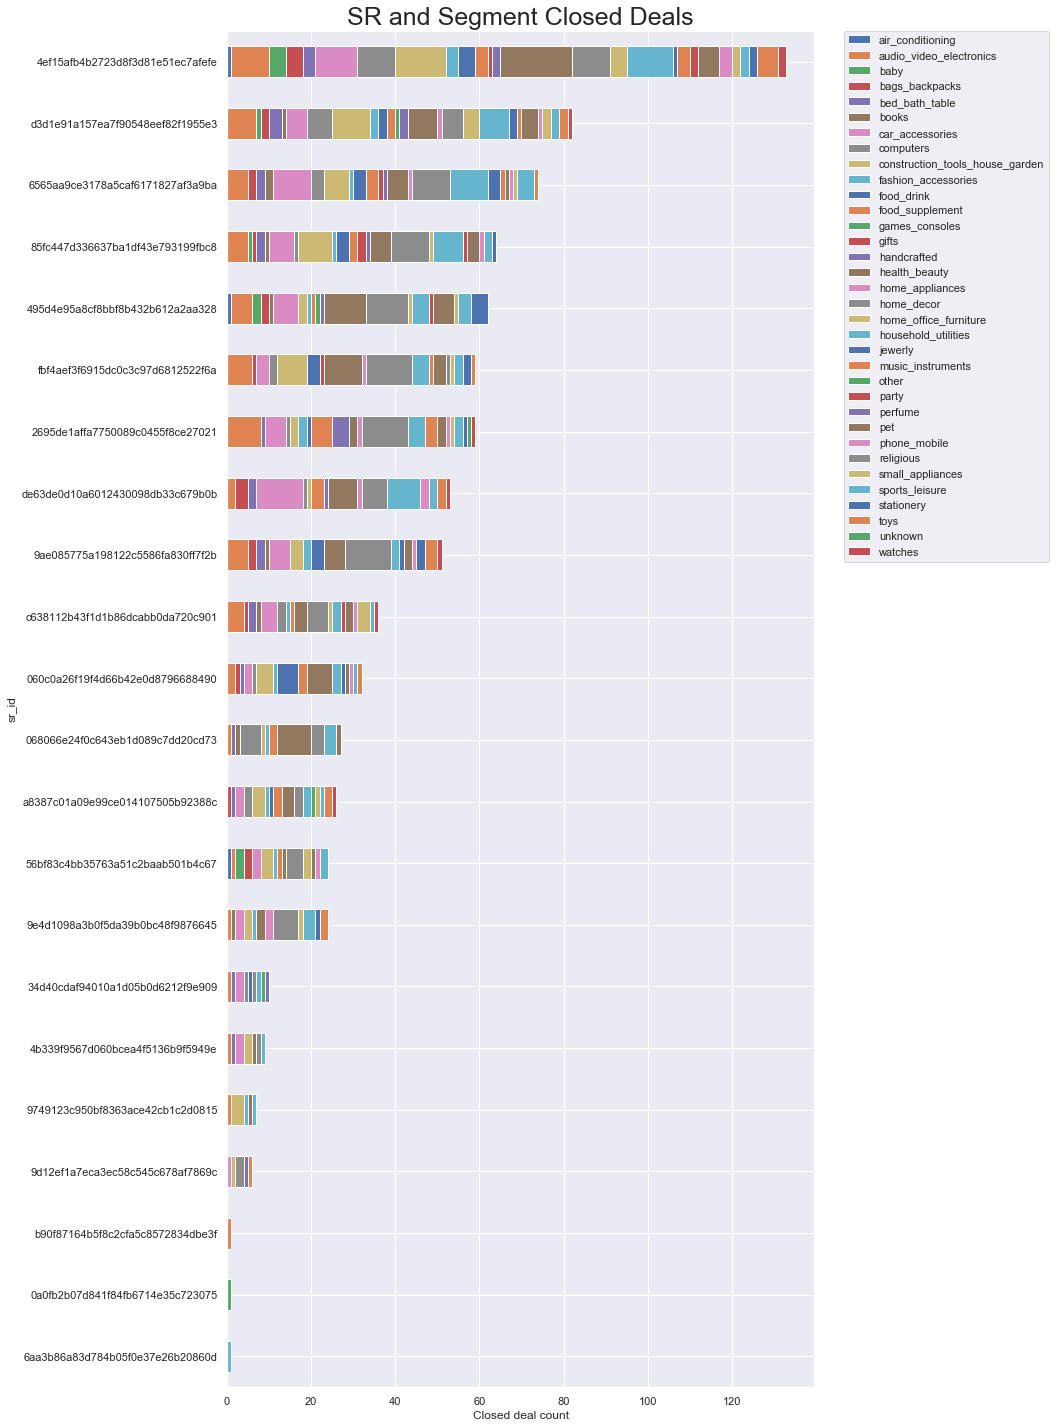

In [4]:
#for segments plot

plt.rcParams['figure.figsize'] = (15.0, 20.0)

segment_df.plot.barh(stacked= True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("SR and Segment Closed Deals",fontsize=25)
plt.xlabel("Closed deal count")
plt.tight_layout()

plt.savefig("charts/sr_segment_analysis.png")

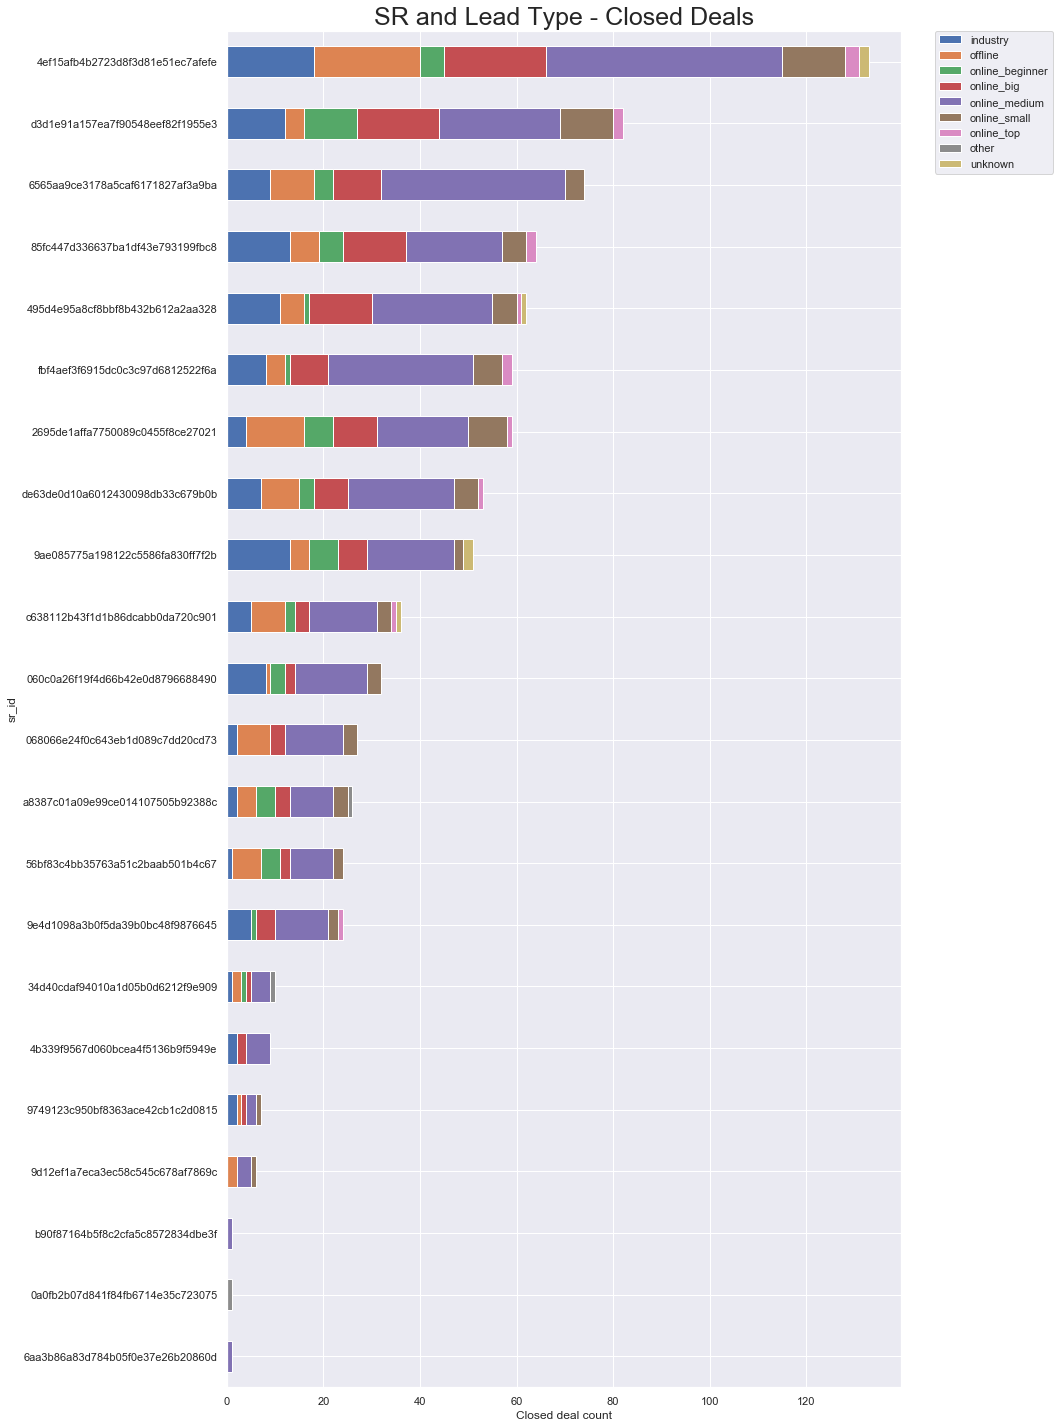

In [5]:
#for lead type plot
plt.rcParams['figure.figsize'] = (15.0, 20.0)
lead_df.plot.barh(stacked= True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("SR and Lead Type - Closed Deals",fontsize=25)
plt.xlabel("Closed deal count")
plt.tight_layout()

plt.savefig("charts/sr_lead_type_analysis.png")

## From these plots, it is evident that
1. SRs aren't assigned only specific business segments as they are getting exposed to all segments. They are given leads as and when they come.
2. This also shows that some SRs are just good at selling anything irrespective of the lead type or business segment.

Eg - SR_id - `4ef15afb4b2723d8f3d81e51ec7afefe` has 133 closed deals ranging in myriad of business segments which are unrelated and from all types of leads (online,offline,email,industry,etc)

3. From 2017 to 2018 we have a significant rise in leads and therefore also a significant rise in closed leads 
![first_contact_date](charts/first_contact_mql.png)
![won_date](charts/won_date_closed_deals.png)

Though, the significant rise is not due to a more effective process, rather because more leads fill in the forms on the landing pages.
- We see two landing pages holding ~50% of the closed deals out of a total of 495 landing pages.
![landing_page_chart](charts/landing_page_counts.png)


## For Q3, Revenue Prediction

We take a look at the order items dataset which gives us a lumpsum idea as to how much revenue those closed deals might be getting us
- `112650` **orders** data with `98666` unique order ids (meaning ~12% (13984) orders contains more than one item).
- `32951` unique **products** which are ordered.
- `3095` unique **sellers**.
- Mean average **cost per order** is `120` with minimum order amount being `0.8` and maximum being `6735`.
- Mean average **frieght value** amount per order is `20` with minimum value at `15.8` and maximum going to `401`.


In [6]:
orders_df = pd.read_csv("data/adnu_order_items_dataset.csv")
orders_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,price,freight_value
count,112650,112650.000000,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN
mean,NaN,1.197834,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,134.900000,21.150000


In [7]:
quantity_df = orders_df.groupby(['order_id', 'product_id','seller_id','price'])['order_item_id'].agg({"quantity":"max"}).reset_index()
quantity_df['order_price'] = quantity_df['price']*quantity_df['quantity']
quantity_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,order_id,product_id,seller_id,price,quantity,order_price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,1,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,1,199.90
...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,1,299.99
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,1,350.00
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,1,99.90
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,1,55.99


In [8]:
#multiple product quantity summary
tdf= quantity_df.quantity.value_counts().sort_values()
tdf = pd.DataFrame({'quantity':tdf.index, 'order_counts':tdf.values}).sort_values("order_counts",ascending=False) 
tdf.head()

,quantity,order_counts
16,1,91796
15,2,8029
14,3,1485
13,4,569
12,5,249


In [9]:
quantity_df[quantity_df["quantity"]>1]

,order_id,product_id,seller_id,price,quantity,order_price
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,2,99.80
31,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,3,63.99
39,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,3,74.67
43,001d8f0e34a38c37f7dba2a37d4eba8b,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,2,37.98
69,002c9def9c9b951b1bec6d50753c9891,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,78.00,2,156.00
...,...,...,...,...,...,...
102362,ffd84ab39cd5e873d8dba24342e65c01,fcf50ee5ad1f1a48671052487d2b0bff,0be8ff43f22e456b4e0371b2245e4d01,24.90,2,49.80
102385,ffe4b41e99d39f0b837a239110260530,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,19.00,2,38.00
102396,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,21.90,3,65.70
102413,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,2,360.00


In [10]:
#Aggregating total revenue per seller
total_revenue_df = quantity_df.groupby(['seller_id'])['order_price'].agg('sum').reset_index()
total_revenue_df

,seller_id,order_price
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25318.93
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1300.10
4,003554e2dce176b5555353e4f3555ac8,120.00
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86
3093,fffd5413c0700ac820c7069d66d98c89,9328.20


In [39]:
#merging funnel df and total revenue df (379 out of 841 leads have seller data)
funnel_df.first_contact_date = pd.to_datetime(funnel_df.first_contact_date) #normalizing contact date
funnel_df["contact_month"] = funnel_df.first_contact_date.dt.month
final_df_left = funnel_df.merge(total_revenue_df, on='seller_id', how="left")
final_df_inner = funnel_df.merge(total_revenue_df, on='seller_id', how="inner")


final_df_inner

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration,contact_month,contact_year,order_price
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,5 days 19:58:54.000000000,2,2018,858.00
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,63 days 17:27:23.000000000,4,2018,23065.02
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267 days 20:17:45.000000000,10,2017,638.50
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,unknown,manufacturer,0.0,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,1 days 18:04:05.000000000,2,2018,97.90
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown,4 days 17:01:57.000000000,4,2018,129.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,98826328c3a60215e53b342560084571,f46490624488d3ff7ce78613913a7711,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-16 19:51:05,health_beauty,online_big,eagle,reseller,0.0,2018-04-04,73f31a40697cc90a86c1273563ac230e,other,42 days 19:51:05.000000000,4,2018,5802.85
375,245710681d51a6dfb80ab06683f3be01,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,computers,unknown,unknown,reseller,0.0,2018-04-23,b76ef37428e6799c421989521c0e5077,organic_search,14 days 21:49:28.000000000,4,2018,126.00
376,cd803c8ab3c2afa5430eeb195bcebe6a,33dd941c27854f7625b968cc6195a552,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-03-28 22:42:55,household_utilities,online_medium,cat,reseller,0.0,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,email,1 days 22:42:55.000000000,3,2018,6787.50
377,676207ddcc8087437135a4b461fc07cb,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,reseller,0.0,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,12 days 12:27:44.000000000,4,2018,242.00


In [12]:
print("Declared monthly revenue of seller(count) in all closed leads dataset - ",len(final_df_left[final_df_left.declared_monthly_revenue>0]))
print("Declared monthly revenue of seller(count) in closed leads dataset merged with calculated revenue from orders data - ",len(final_df_inner[final_df_inner.declared_monthly_revenue>0]))


Declared monthly revenue of seller(count) in all closed leads dataset -  45
Declared monthly revenue of seller(count) in closed leads dataset merged with calculated revenue from orders data -  0


This shows that declared_monthly revenue is not useful in the dataset

In [13]:
#converting timedelta to numeric day count for input to classifier
final_df_inner["close_duration"]= pd.to_timedelta(final_df_inner.close_duration)
final_df_inner["closing_days"] = final_df_inner.close_duration.values/np.timedelta64(1, 'D')

In [14]:
from sklearn import preprocessing
column_list = ['business_segment','lead_type','lead_behaviour_profile','business_type','landing_page_id','origin']

for column in column_list:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(final_df_inner[column])
    final_df_inner[column] = encoder.transform(final_df_inner[column])


In [15]:
from sklearn.model_selection import train_test_split

features = column_list + ['contact_month','closing_days']
target = ['order_price']

X = final_df_inner[features].values
y = final_df_inner[target].values
split_test_size = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (341, 8)
Training Labels Shape: (38, 8)
Testing Features Shape: (341, 1)
Testing Labels Shape: (38, 1)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf_model = RandomForestRegressor(n_estimators=16, min_samples_split=2, random_state = 8)
rf_model.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=16,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [17]:
from sklearn.metrics import mean_absolute_error
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print("Mean Absolute error in predicting revenue amount (Training):-",mean_absolute_error(y_train,rf_predict_train))
print("Mean Absolute error in predicting revenue amount (Testing):-",mean_absolute_error(y_test,rf_predict_test))

Mean Absolute error in predicting revenue amount (Training):- 984.8478500733135
Mean Absolute error in predicting revenue amount (Testing):- 1286.4537171052634


In [18]:
feature_imp = pd.Series(rf_model.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

closing_days              0.324933
business_segment          0.266370
lead_behaviour_profile    0.109720
landing_page_id           0.101673
origin                    0.089613
lead_type                 0.080434
contact_month             0.023464
business_type             0.003792
dtype: float64

This shows that revenue depends a lot on closing_day (Turnaround time) and business segment of the seller and partially on lead_behaviour profile and landing_page

In [22]:
#Trying TPOT automl
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=100, verbosity=2, random_state=8,n_jobs=-2)
tpot.fit(X_train, np.ravel(y_train,order='C'))
print(tpot.score(X_test, np.ravel(y_test,order='C')))
tpot.export('output/tpot_revenue_pipeline.py')

Generation 1 - Current best internal CV score: -53601669.29806571
Generation 2 - Current best internal CV score: -53542333.91438599
Generation 3 - Current best internal CV score: -51714406.284565695
Generation 4 - Current best internal CV score: -51714406.284565695
Generation 5 - Current best internal CV score: -51714406.284565695
Generation 6 - Current best internal CV score: -51714406.284565695
Generation 7 - Current best internal CV score: -51714406.284565695
Generation 8 - Current best internal CV score: -51714406.284565695
Generation 9 - Current best internal CV score: -51714406.284565695
Generation 10 - Current best internal CV score: -51714406.284565695

Best pipeline: LassoLarsCV(RandomForestRegressor(OneHotEncoder(input_matrix, minimum_fraction=0.15, sparse=False, threshold=10), bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=14, n_estimators=100), normalize=False)
-4376958.974890612


## For Q2 - Leads close or not

Lets see the datasets mql_leads, closed_leads

MQL has first_contact_date, landing_page_id and origin

In [25]:
leads_df = pd.read_csv("data/adnu_marketing_qualified_leads_dataset.csv")
leads_df

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [40]:
#converting timedelta to numeric day count for input to classifier
final_df_left["close_duration"]= pd.to_timedelta(final_df_left.close_duration)
final_df_left["closing_days"] = final_df_left.close_duration.values/np.timedelta64(1, 'D')
final_df_left["contact_year"] = final_df_left.first_contact_date.dt.year

In [42]:
final_df_left.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration,contact_month,contact_year,order_price,closing_days
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,5 days 19:58:54,2,2018,858.00,5.832569
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,34 days 20:17:59,4,2018,NaN,34.845822
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,63 days 17:27:23,4,2018,23065.02,63.727350
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,unknown,reseller,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,3 days 13:51:03,1,2018,NaN,3.577118
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267 days 20:17:45,10,2017,638.50,267.845660


Let's predict `closing days` by selecting features which are there in mql table namely
- landing_page_id
- origin
- contact_month
- contact_year



In [44]:
from sklearn import preprocessing
column_list = ['landing_page_id','origin'] #'contact_month','contact_year']

for column in column_list:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(final_df_left[column])
    final_df_left[column] = encoder.transform(final_df_left[column])
    
    

In [46]:
from sklearn.model_selection import train_test_split

features = column_list + ['contact_month','contact_year']
target = ['closing_days']

X = final_df_left[features].values
y = final_df_left[target].values
split_test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (714, 4)
Training Labels Shape: (127, 4)
Testing Features Shape: (714, 1)
Testing Labels Shape: (127, 1)


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf_model_leadclose = RandomForestRegressor(n_estimators=50, min_samples_split=2, random_state = 8)
rf_model_leadclose.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [57]:
from sklearn.metrics import mean_absolute_error
rf_predict_train = rf_model_leadclose.predict(X_train)
rf_predict_test = rf_model_leadclose.predict(X_test)

print("Mean Absolute error in predicting revenue amount (Training):-",mean_absolute_error(y_train,rf_predict_train))
print("Mean Absolute error in predicting revenue amount (Testing):-",mean_absolute_error(y_test,rf_predict_test))

Mean Absolute error in predicting revenue amount (Training):- 28.09278260107115
Mean Absolute error in predicting revenue amount (Testing):- 44.297685735063965


In [76]:
feature_imp = pd.Series(rf_model_leadclose.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

contact_month      0.466704
landing_page_id    0.222467
contact_year       0.196732
origin             0.114096
dtype: float64

In [61]:
import xgboost as xgb
clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)

[22:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

0.554293136069641
0.39574759177096813


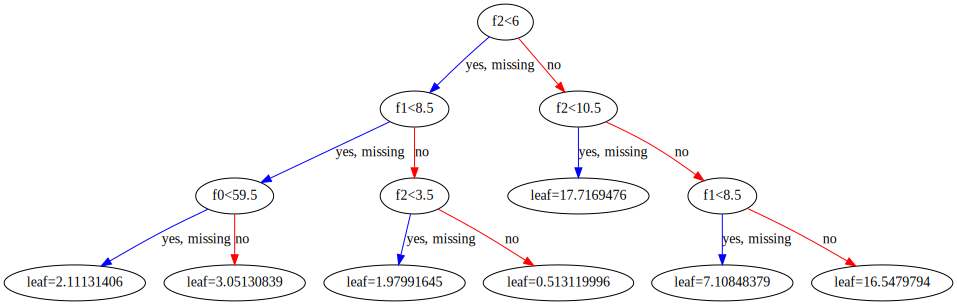

In [75]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

xgb.to_graphviz(clf, num_trees=4)